In [5]:
import os
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
np.random.seed(42)

In [ ]:
project_dir = 'D:\\Heart_Disease_Project'
os.makedirs(project_dir, exist_ok=True)
os.makedirs(os.path.join(project_dir, 'data'), exist_ok=True)
os.makedirs(os.path.join(project_dir, 'notebooks'), exist_ok=True)
os.makedirs(os.path.join(project_dir, 'models'), exist_ok=True)
os.makedirs(os.path.join(project_dir, 'ui'), exist_ok=True)
os.makedirs(os.path.join(project_dir, 'deployment'), exist_ok=True)
os.makedirs(os.path.join(project_dir, 'results'), exist_ok=True)

In [7]:
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets
df = X.copy()
df['target'] = y
raw_data_path = os.path.join(project_dir, 'data', 'heart_disease.csv')
df.to_csv(raw_data_path, index=False)
print(f"Raw dataset saved to {raw_data_path}")
print("\nMetadata:\n", heart_disease.metadata)
print("\nVariable Information:\n", heart_disease.variables)

Raw dataset saved to D:\Heart_Disease_Project\data\heart_disease.csv

Metadata:
 {'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis 

In [10]:
df.replace('?', np.nan, inplace=True)
print("\nMissing values per column:\n", df.isnull().sum())
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in categorical_cols:
    df[col] = df[col].astype('category')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [12]:
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

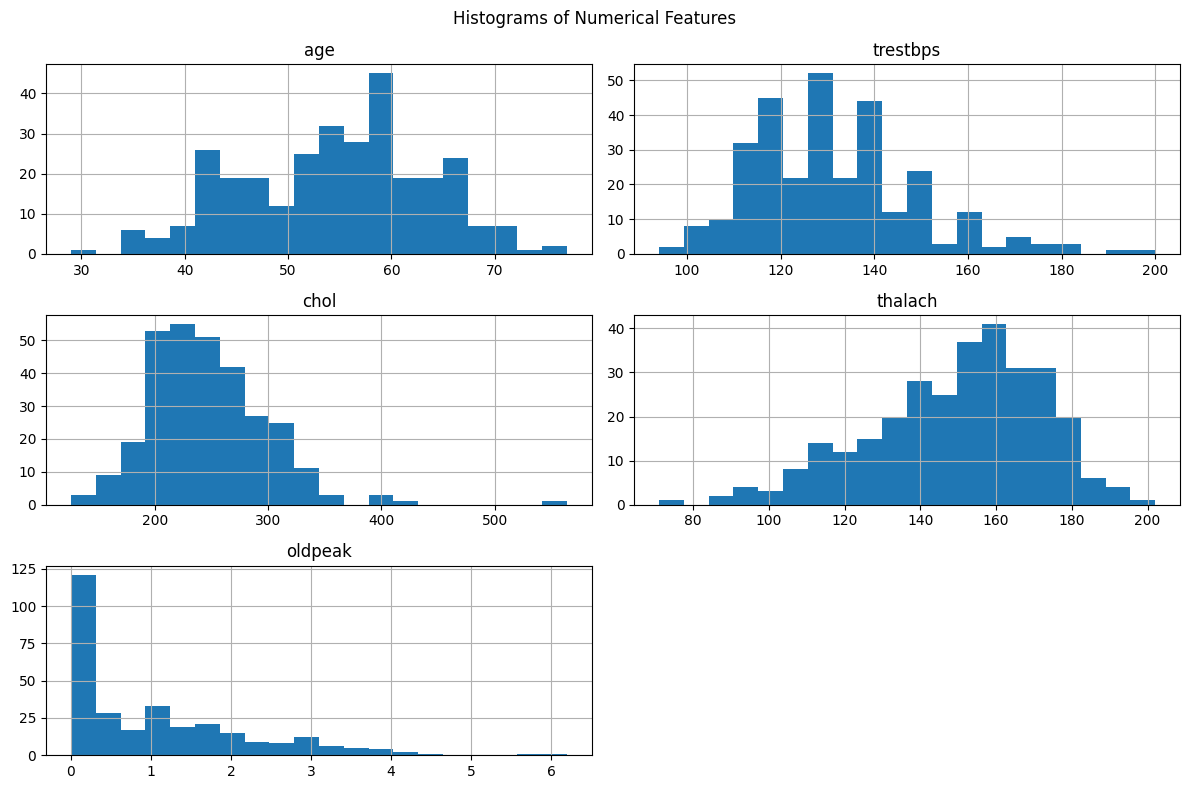

In [13]:
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

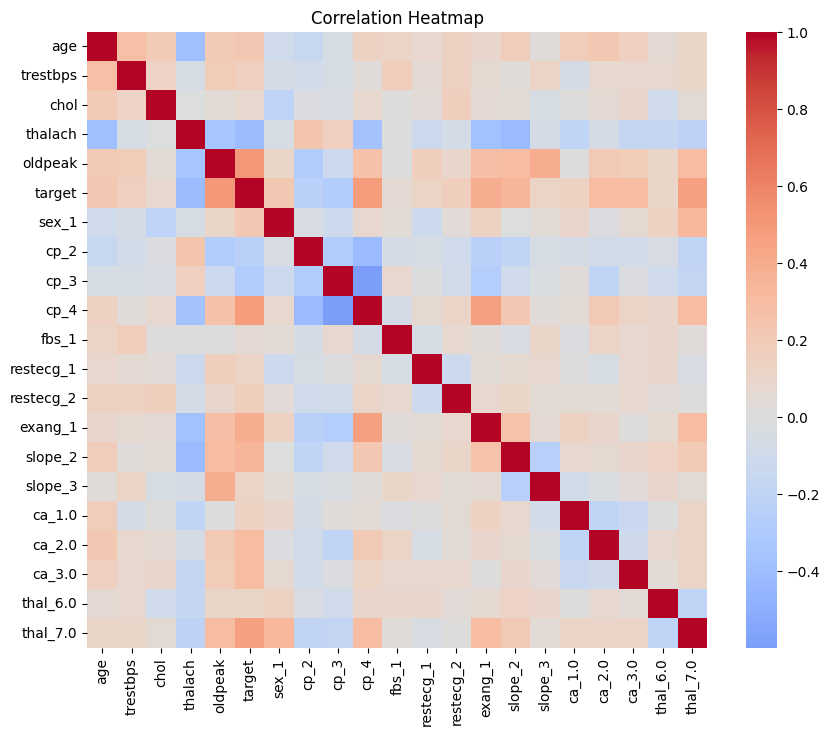

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

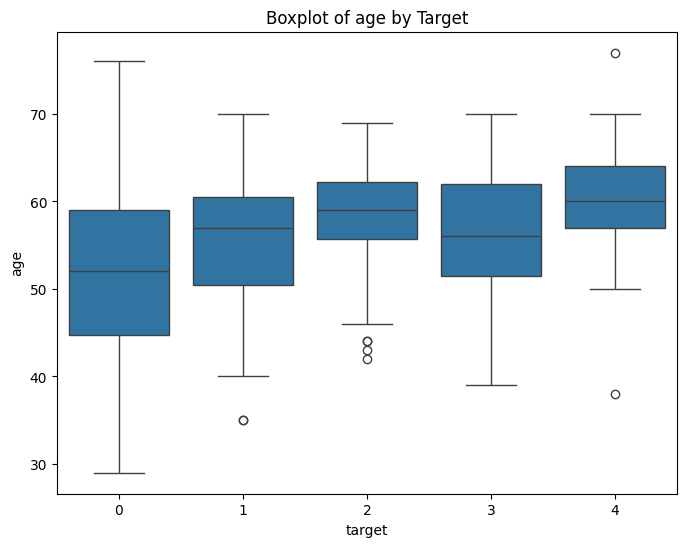

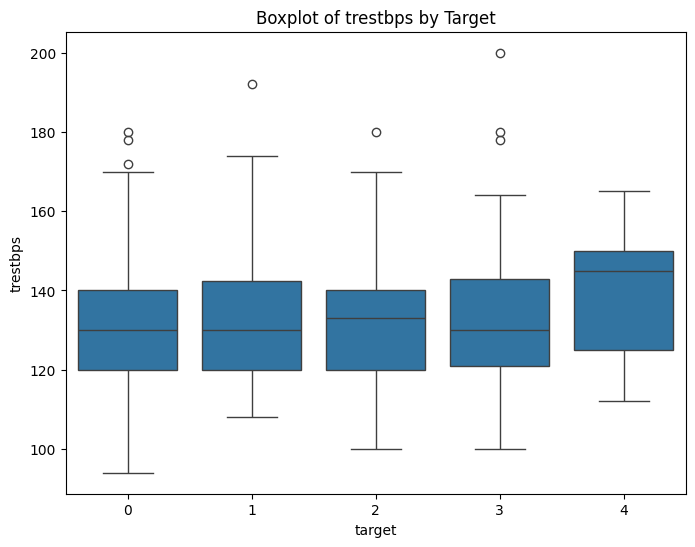

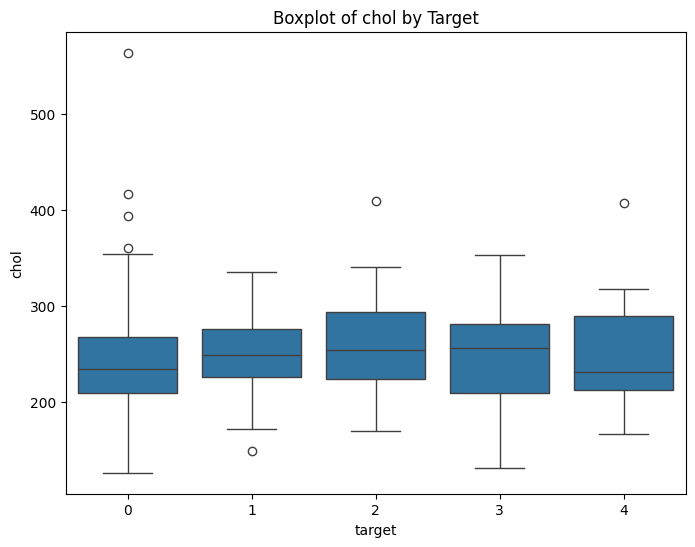

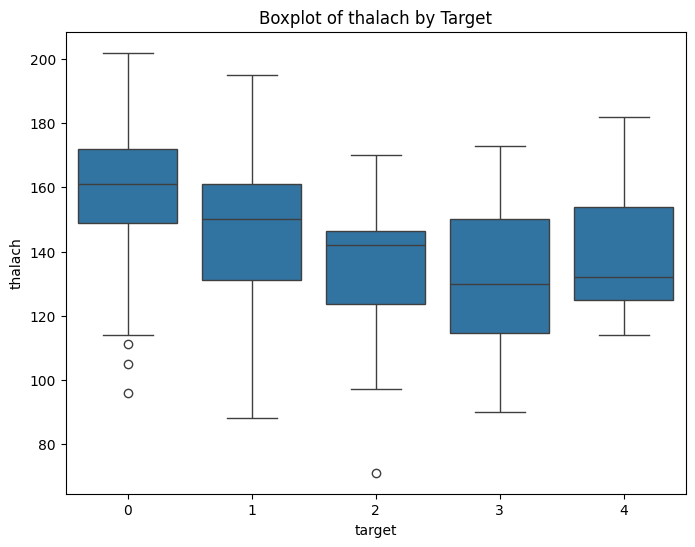

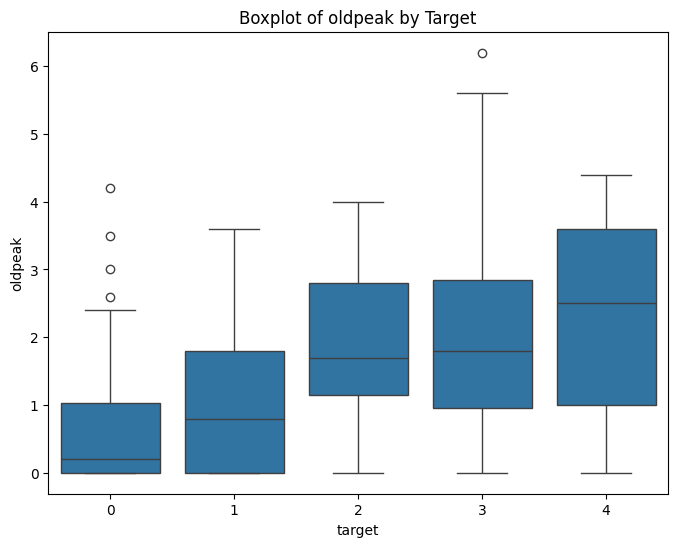

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'Boxplot of {col} by Target')
    plt.show()

In [16]:
cleaned_data_path = os.path.join(project_dir, 'data', 'heart_disease_cleaned.csv')
df_encoded.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved to {cleaned_data_path}")

Cleaned dataset saved to D:\Heart_Disease_Project\data\heart_disease_cleaned.csv
